#Import Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

#Import Dataset

In [8]:
from google.colab import files
uploaded = files.upload()

Saving heart_attack_dataset.csv to heart_attack_dataset.csv


In [9]:
df = pd.read_csv('heart_attack_dataset.csv')

#Data Understanding

In [10]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

In [47]:
obj_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
#checking if there is a duplicated data
df.duplicated().sum()

np.int64(0)

In [17]:
#checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,372974.0,56.975151,15.867016,30.0,43.00,57.0,71.00,84.0
Cholesterol,372974.0,199.455844,57.723381,100.0,149.00,199.0,249.00,299.0
BloodPressure,372974.0,134.508234,25.984528,90.0,112.00,134.0,157.00,179.0
HeartRate,372974.0,89.495043,17.342658,60.0,74.00,89.0,105.00,119.0
BMI,372974.0,29.006733,6.345460,18.0,23.50,29.0,34.50,40.0
Smoker,372974.0,0.499225,0.500000,0.0,0.00,0.0,1.00,1.0
Diabetes,372974.0,0.500987,0.500000,0.0,0.00,1.0,1.00,1.0
Hypertension,372974.0,0.500973,0.500000,0.0,0.00,1.0,1.00,1.0
FamilyHistory,372974.0,0.499901,0.500001,0.0,0.00,0.0,1.00,1.0
PhysicalActivity,372974.0,3.003475,2.000114,0.0,1.00,3.0,5.00,6.0


In [18]:
df["Gender"].value_counts()

,count
Gender,
Male,186770
Female,186204


In [19]:
df["Smoker"].value_counts()

,count
Smoker,
0,186776
1,186198


#Exploratory Data Analysis

<ipython-input-23-bc61d0998a8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender", y="Cholesterol", palette="Set2")


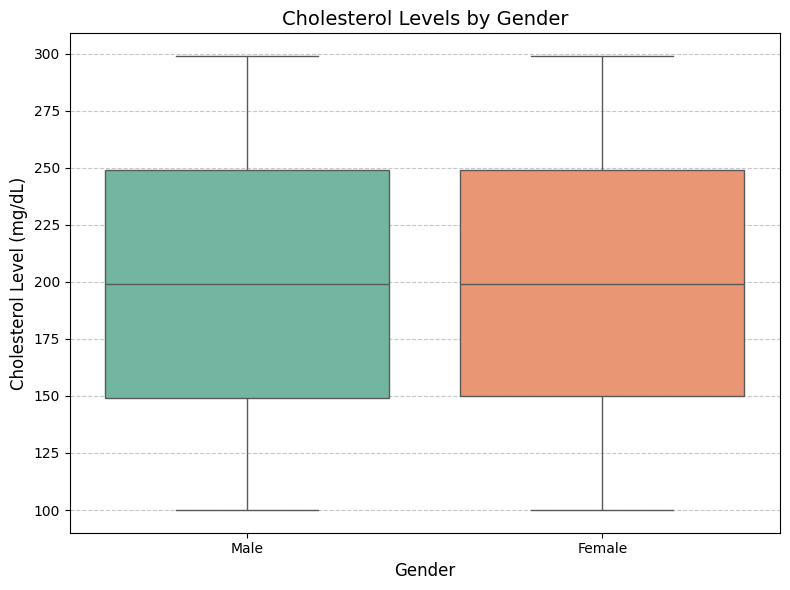

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="Cholesterol", palette="Set2")
plt.title("Cholesterol Levels by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Cholesterol Level (mg/dL)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # adds a light horizontal grid
plt.tight_layout()
plt.show()

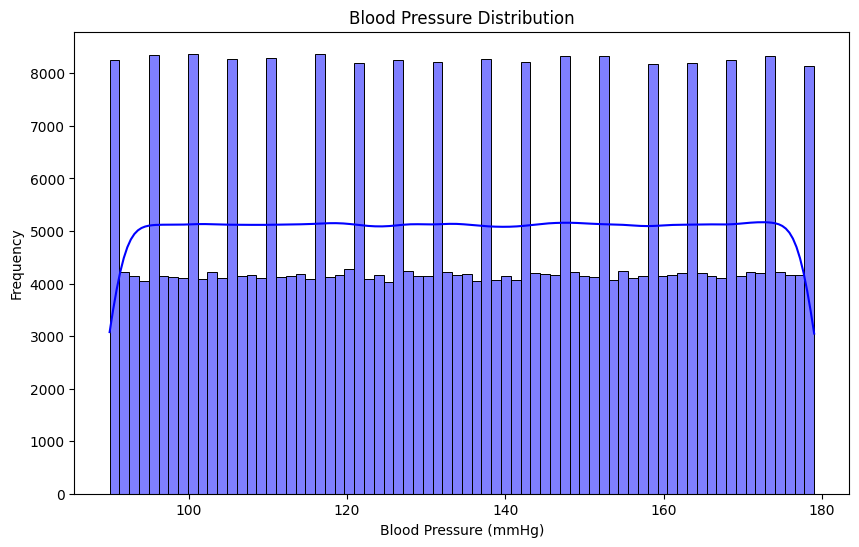

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df["BloodPressure"], kde=True, color="blue")
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.show()

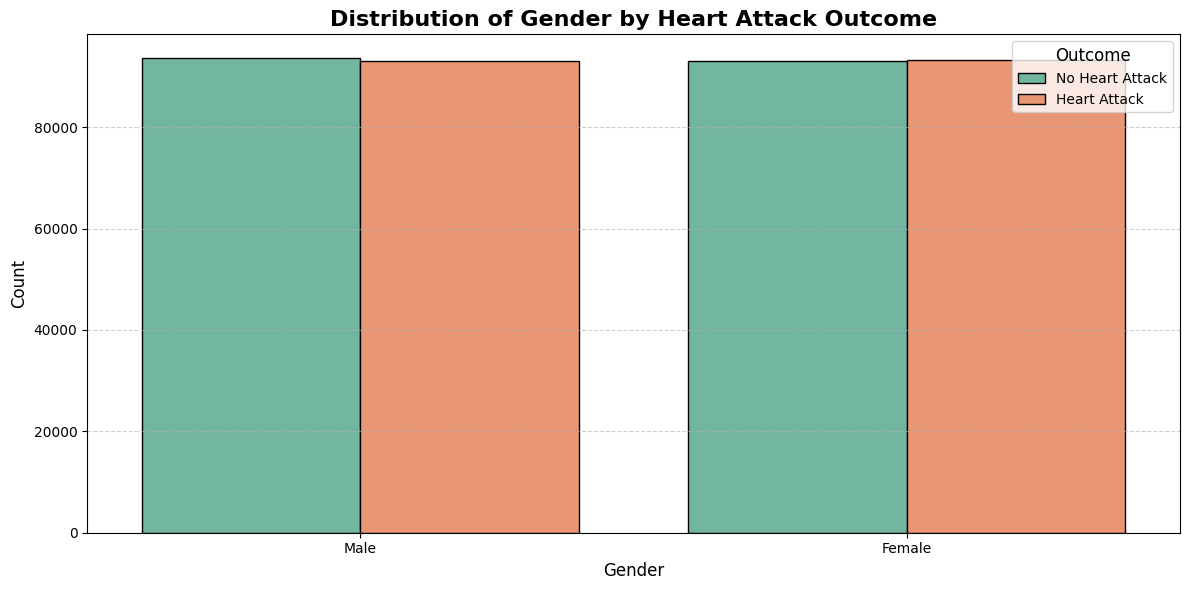

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Gender", hue="Outcome", palette="Set2", edgecolor="black")

plt.title("Distribution of Gender by Heart Attack Outcome", fontsize=16, weight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Outcome", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

In [30]:
df_age = df.groupby(["Age", "Outcome"]).size().reset_index(name="Count")
df_age

,Age,Outcome,Count
0,30,Heart Attack,3329
1,30,No Heart Attack,3386
2,31,Heart Attack,3398
3,31,No Heart Attack,3400
4,32,Heart Attack,3490
...,...,...,...
105,82,No Heart Attack,3476
106,83,Heart Attack,3362
107,83,No Heart Attack,3308
108,84,Heart Attack,3386


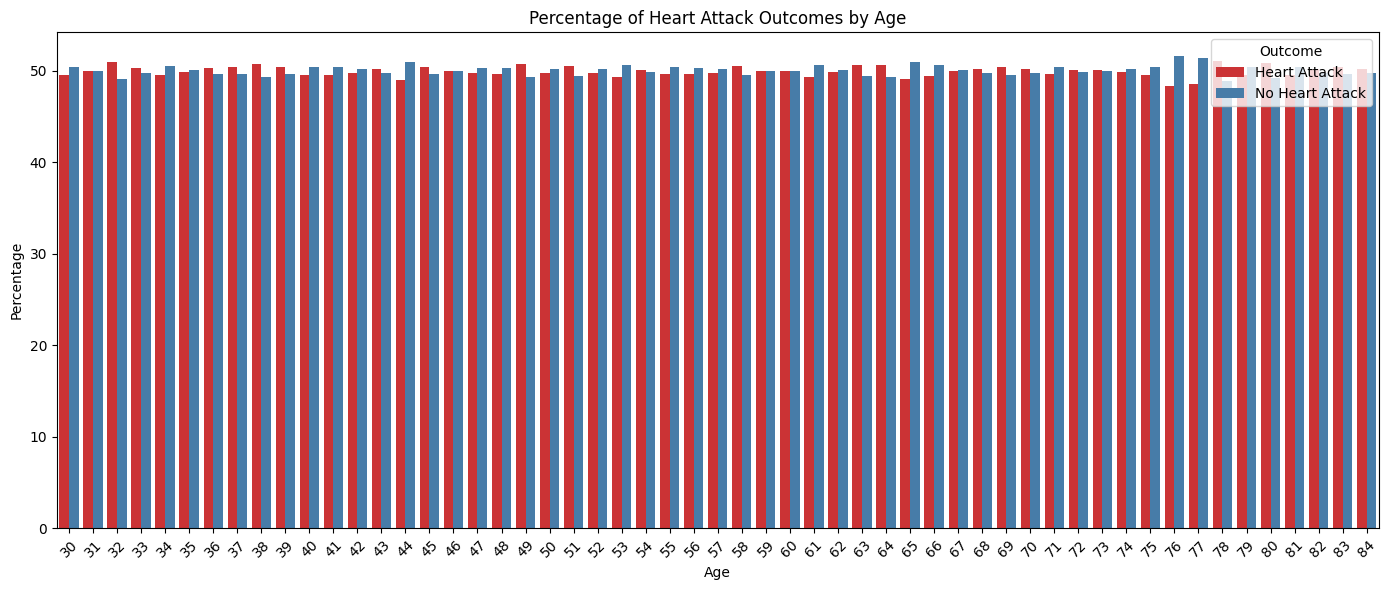

In [38]:
df_age["Total"] = df_age.groupby("Age")["Count"].transform("sum")
df_age["Percentage"] = df_age["Count"] / df_age["Total"] * 100

plt.figure(figsize=(14, 6))
sns.barplot(data=df_age, x="Age", y="Percentage", hue="Outcome", palette="Set1")
plt.title("Percentage of Heart Attack Outcomes by Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

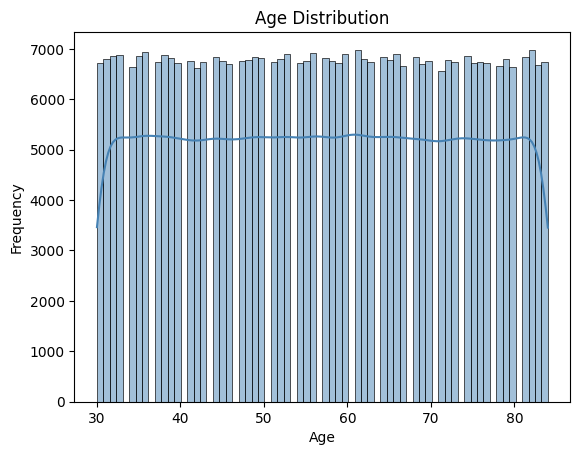

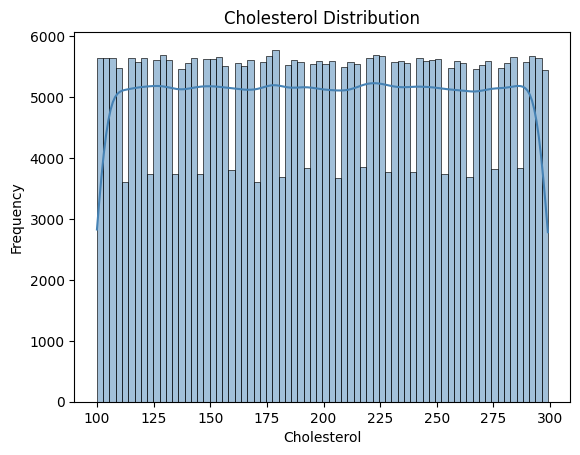

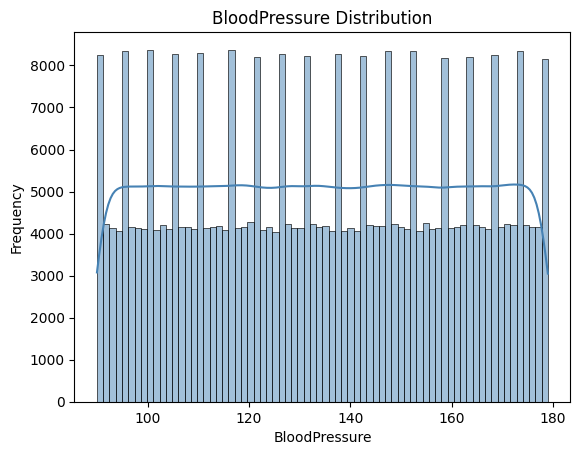

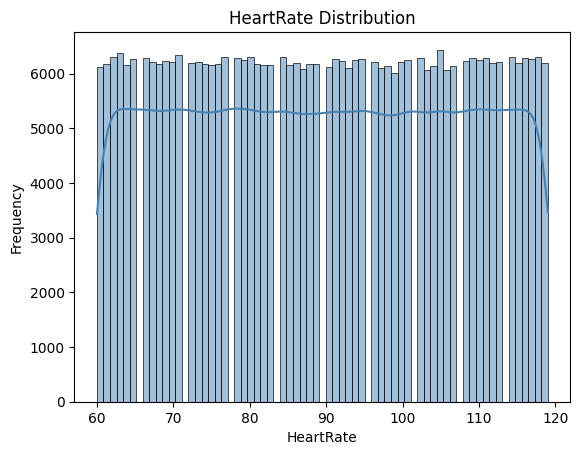

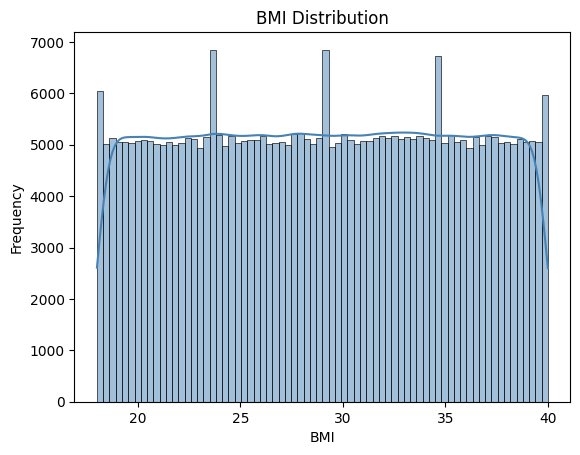

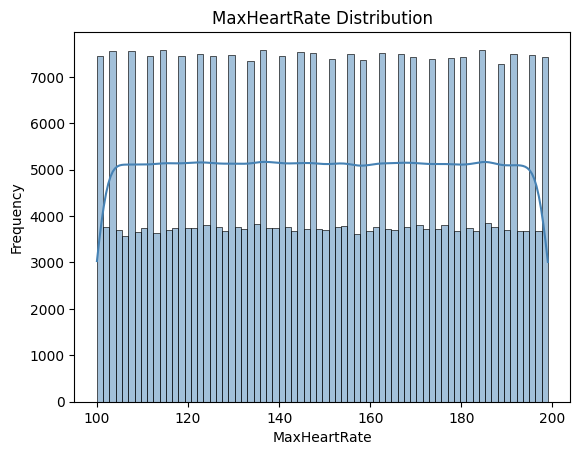

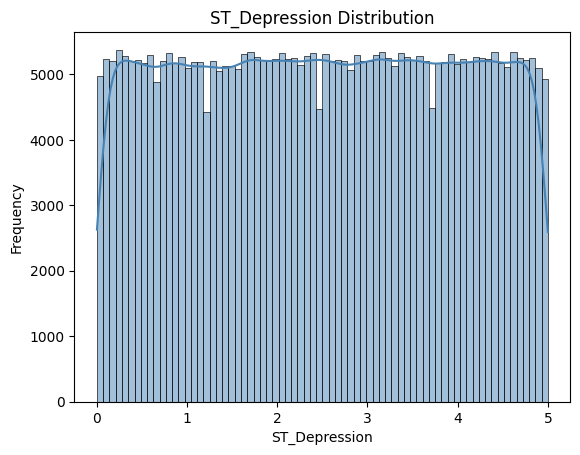

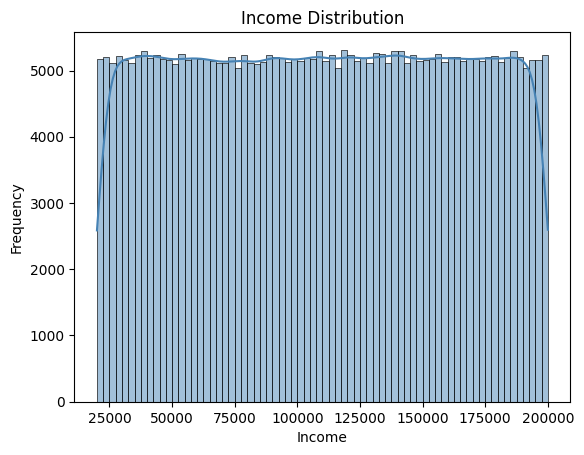

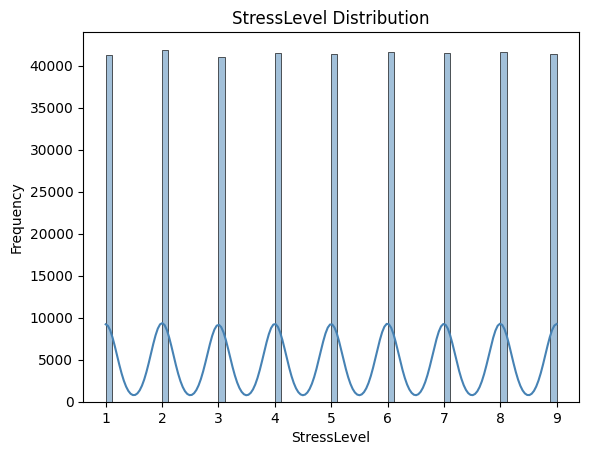

In [34]:
numerical_cols = ["Age", "Cholesterol", "BloodPressure", "HeartRate", "BMI",
                  "MaxHeartRate", "ST_Depression", "Income", "StressLevel"]

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color="steelblue")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

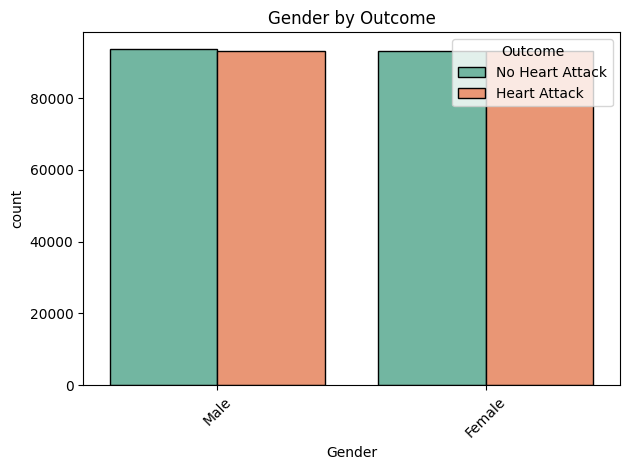

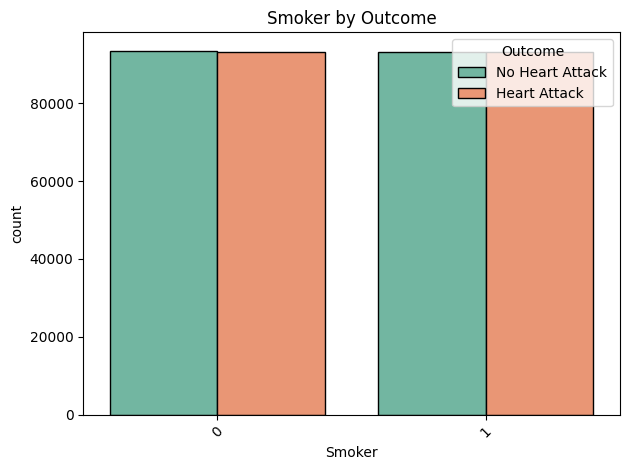

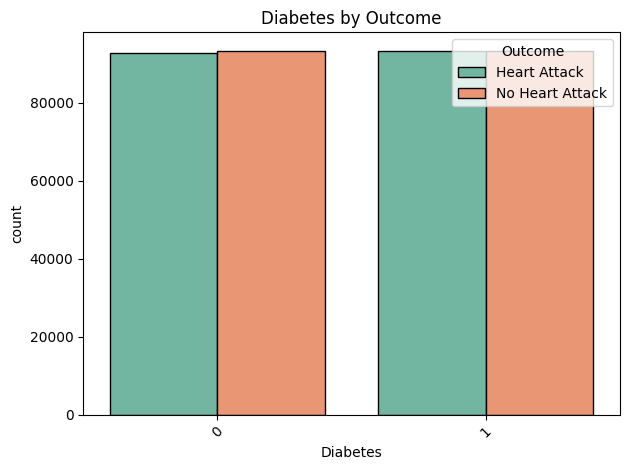

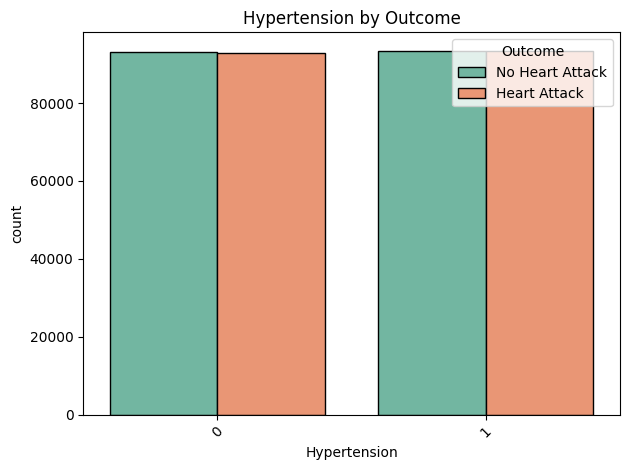

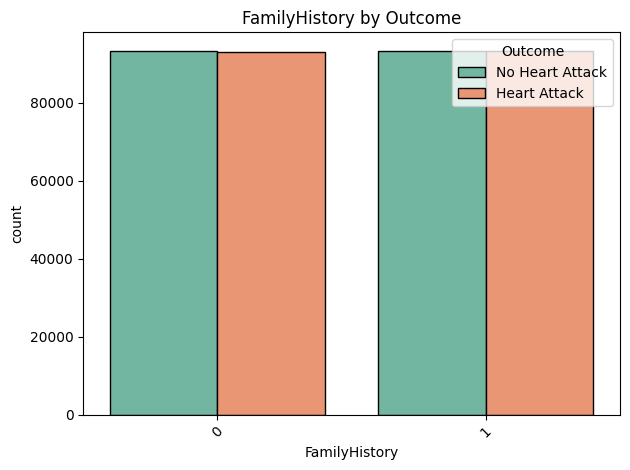

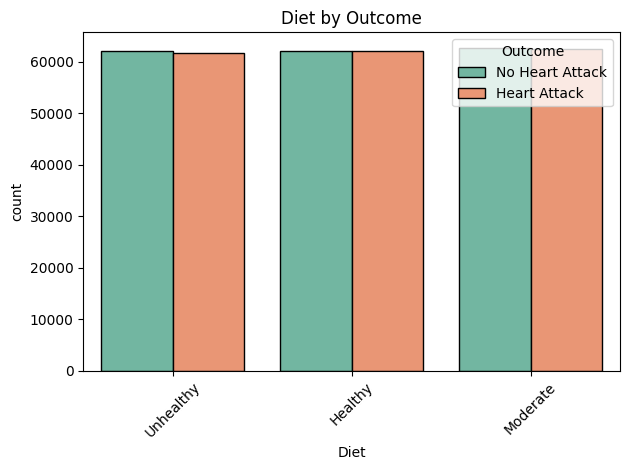

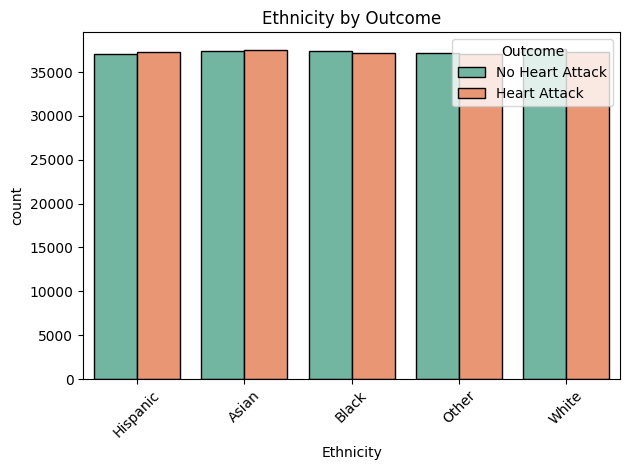

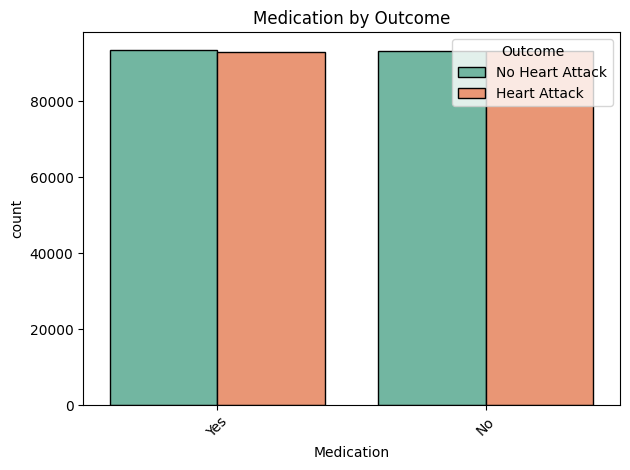

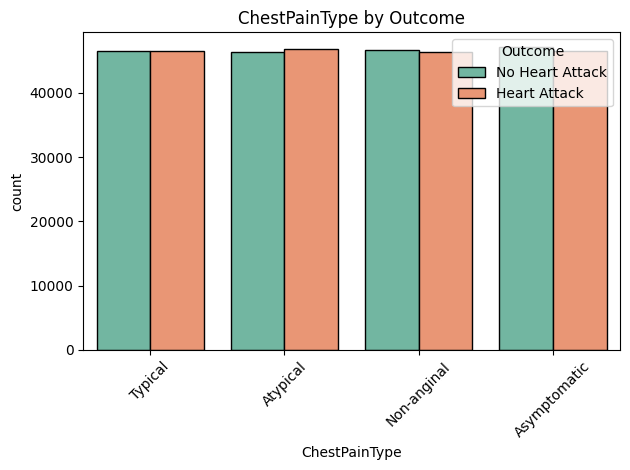

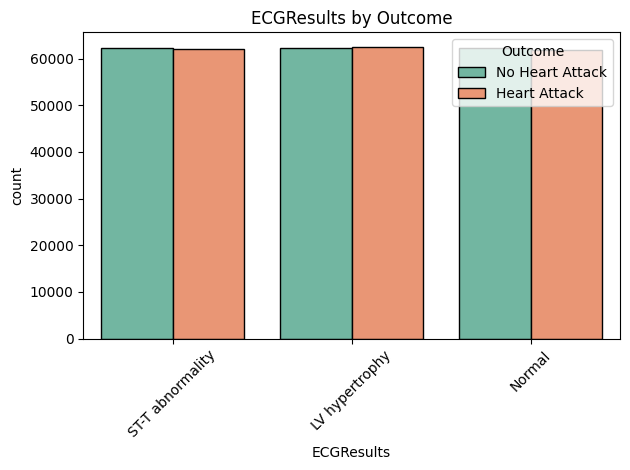

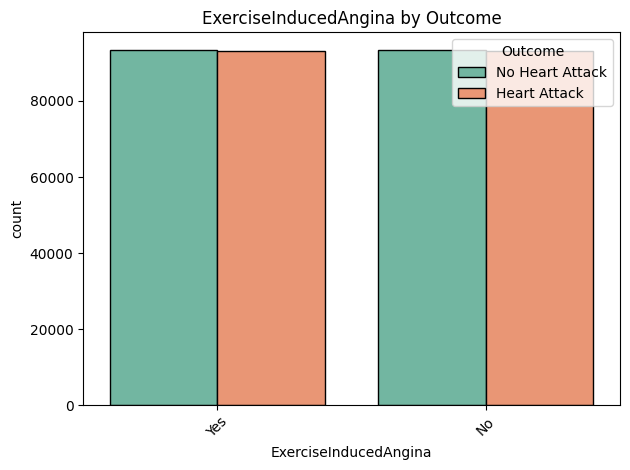

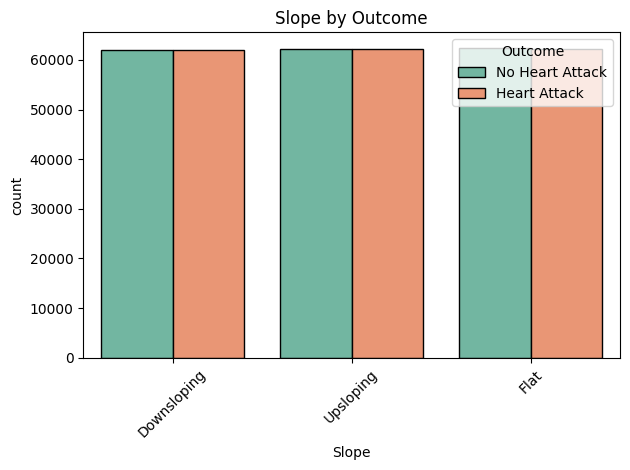

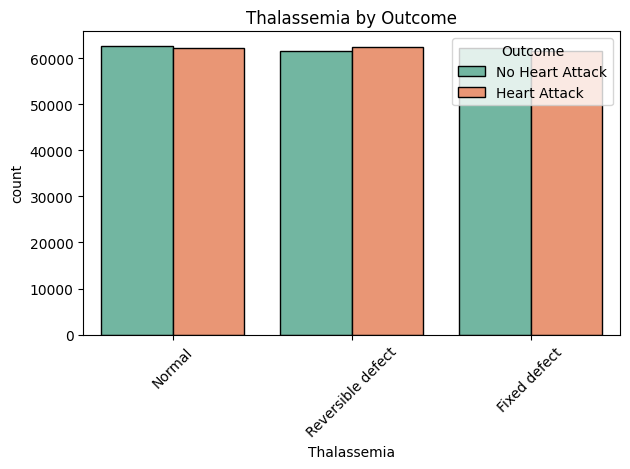

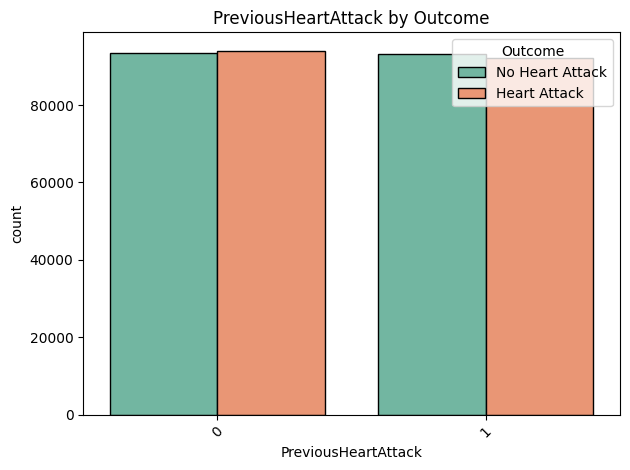

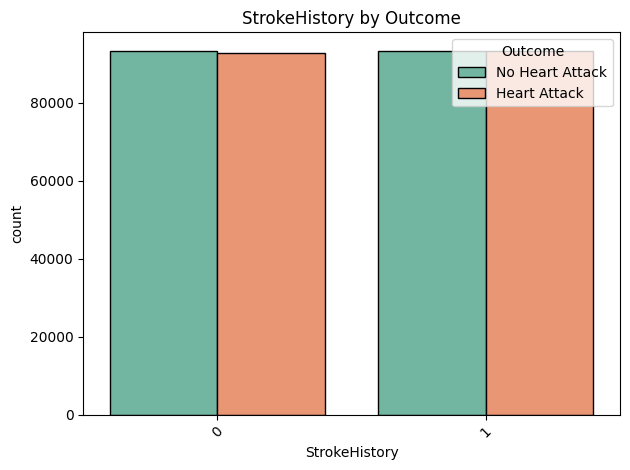

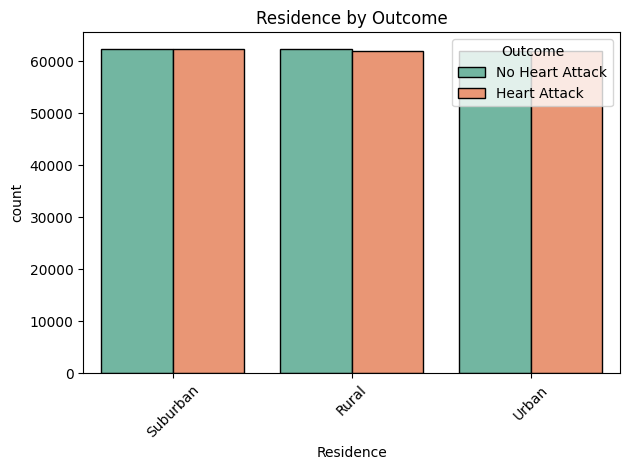

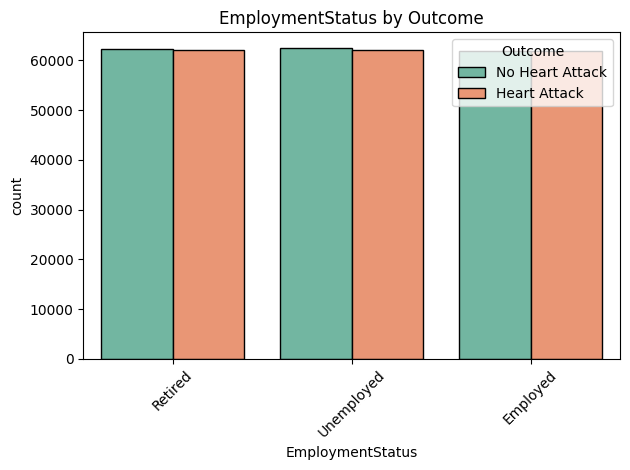

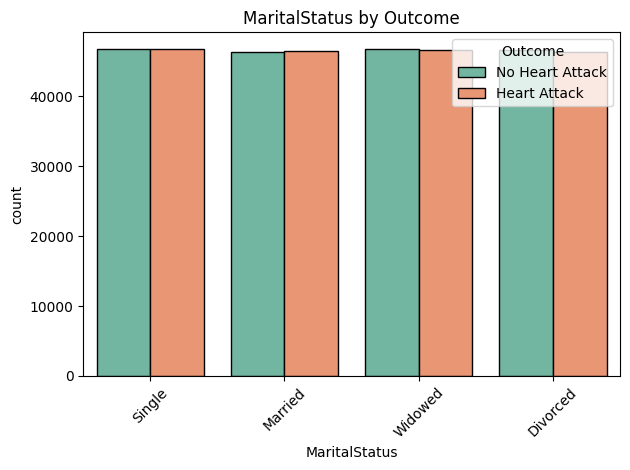

In [36]:
categorical_cols = ["Gender", "Smoker", "Diabetes", "Hypertension", "FamilyHistory",
                    "Diet", "Ethnicity", "Medication", "ChestPainType",
                    "ECGResults", "ExerciseInducedAngina", "Slope", "Thalassemia",
                    "PreviousHeartAttack", "StrokeHistory", "Residence", "EmploymentStatus",
                    "MaritalStatus"]

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue="Outcome", palette="Set2", edgecolor="black")
    plt.title(f"{col} by Outcome")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#ML

In [63]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
ss=StandardScaler()

In [65]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [66]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Naive Bayes Classifier":GaussianNB()
}

In [67]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}

Model: Random Forest Classifier
Accuracy: 0.4967, F1 Score: 0.4793, Recall: 0.4639, Precision: 0.4957
Confusion Matrix:
 [[24715 21970]
 [24960 21599]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51     46685
           1       0.50      0.46      0.48     46559

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



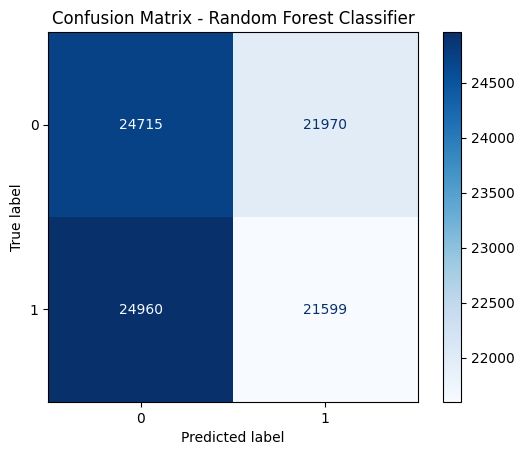

--------------------------------------------------
Model: Decision Tree Classifier
Accuracy: 0.5013, F1 Score: 0.5011, Recall: 0.5016, Precision: 0.5006
Confusion Matrix:
 [[23387 23298]
 [23205 23354]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     46685
           1       0.50      0.50      0.50     46559

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



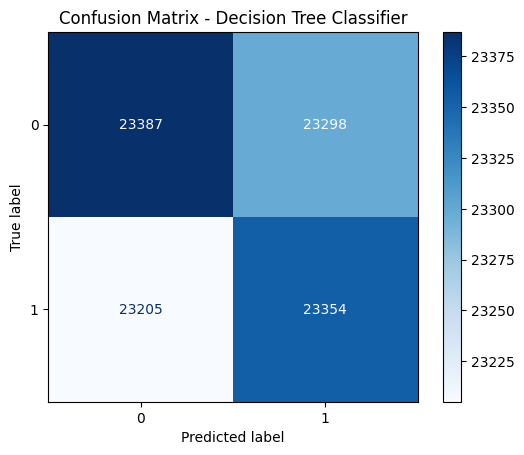

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.5013, F1 Score: 0.5313, Recall: 0.5661, Precision: 0.5006
Confusion Matrix:
 [[20386 26299]
 [20201 26358]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47     46685
           1       0.50      0.57      0.53     46559

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



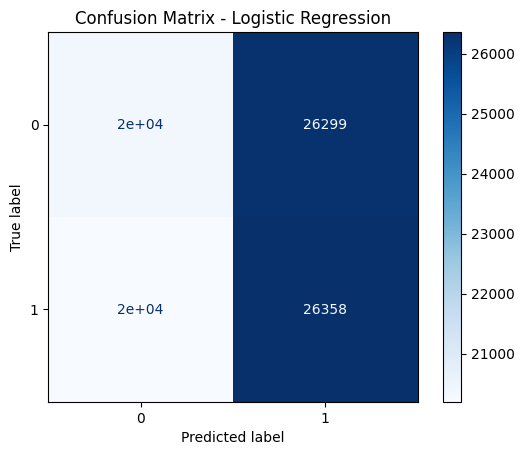

--------------------------------------------------
Model: Naive Bayes Classifier
Accuracy: 0.5007, F1 Score: 0.5308, Recall: 0.5655, Precision: 0.5000
Confusion Matrix:
 [[20358 26327]
 [20228 26331]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47     46685
           1       0.50      0.57      0.53     46559

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



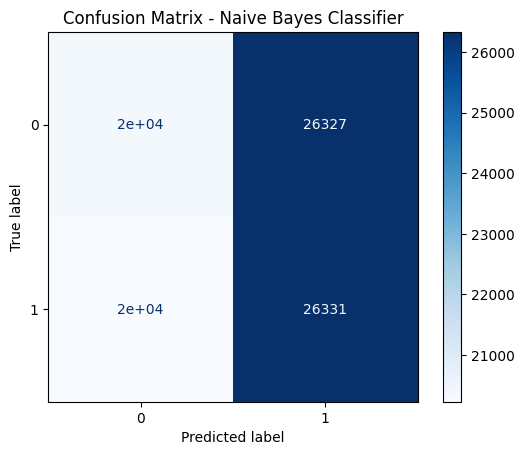

--------------------------------------------------


In [75]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


    disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()

    print("-" * 50)


<ipython-input-76-f918cf30f624>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=acc_df, palette="pastel")


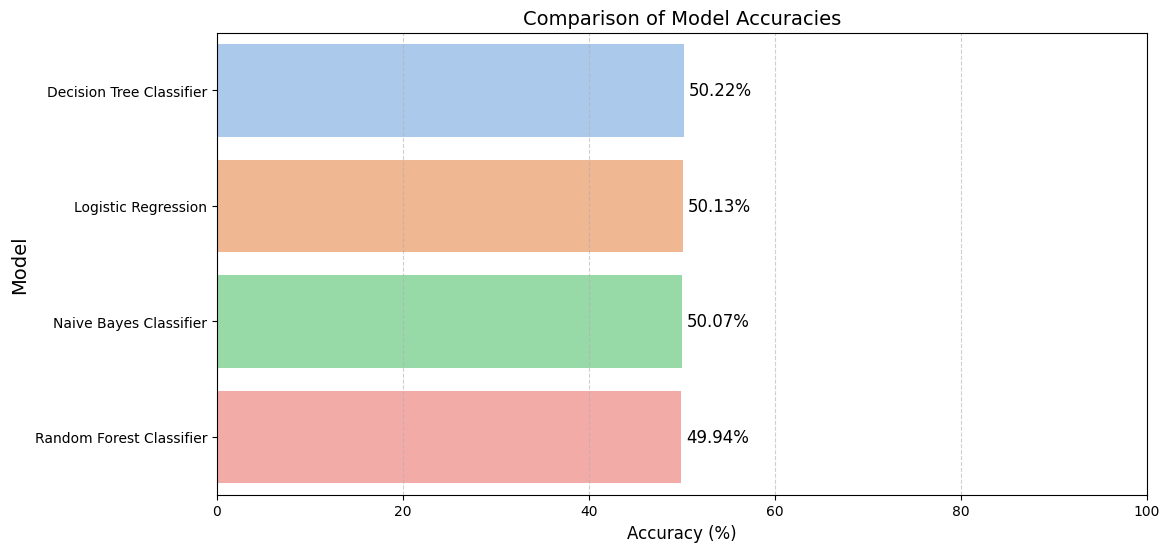

In [76]:
model_accuracies = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc * 100

acc_df = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])

# Sort values for better visualization
acc_df = acc_df.sort_values(by='Accuracy', ascending=False)

#  Bar Plot for Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=acc_df, palette="pastel")

for index, value in enumerate(acc_df["Accuracy"]):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center', fontsize=12)

plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Model", fontsize=14)
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1'}
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47     46685
           1       0.50      0.56      0.53     46559

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244

Confusion Matrix:
 [[20422 26263]
 [20256 26303]]
Test Accuracy: 0.5011


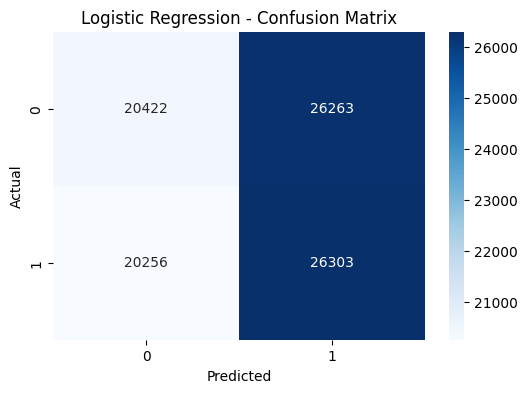

In [82]:
logreg = LogisticRegression(solver='liblinear', random_state=107)

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'class_weight': [None, 'balanced']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best model
best_logreg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred = best_logreg.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5011
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47     46685
           1       0.50      0.56      0.53     46559

    accuracy                           0.50     93244
   macro avg       0.50      0.50      0.50     93244
weighted avg       0.50      0.50      0.50     93244



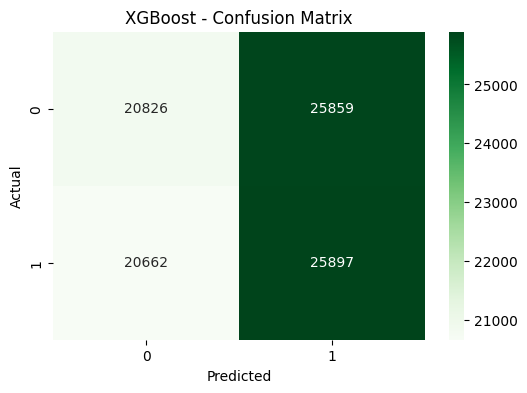

In [86]:
# Define the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model
xgb_model.fit(x_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(x_test)

# Accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()